In [1]:
import pandas as pd
# Our scripts
import sys  
sys.path.insert(0, '../src')
import sparsity_analysis as spa
%load_ext autoreload
%autoreload 2

## How K_ac sparsity affects population structure

### Produce dataframe of model dynamics with different sparse matrices

In [ ]:
sizes = list(range(3,8))
num = 250
lower, upper = 0.001, 0.01
def sparsity(n): 
    return 0.5
end_time = 200

results = spa.analyze(sizes,
                      num,
                      lower,
                      upper,
                      sparsity,
                      end_time)
print(results.shape)
results.to_csv('../Data/sparsity_analysis.tsv', sep='\t', index=False)

### Plot sparsity against each statistic and population size

In [3]:
df = pd.read_csv('../Data/sparsity_analysis.tsv', sep='\t')
df.head()

,total,growth_rate,has_grown,euclidian,shannon_index,bray_curtis,init,density,size
0,0.043800,0.004681,0.666667,0.022873,-0.298859,0.344130,0,0.111111,3
1,0.043786,0.004143,0.666667,0.015875,-0.170072,0.082347,1,0.111111,3
2,0.042950,0.004930,0.666667,0.024645,-0.141111,0.513806,2,0.111111,3
3,0.043616,0.005252,0.666667,0.023237,-0.269089,0.380659,3,0.111111,3
4,0.043881,0.007216,0.666667,0.026531,-0.350274,0.341461,4,0.111111,3


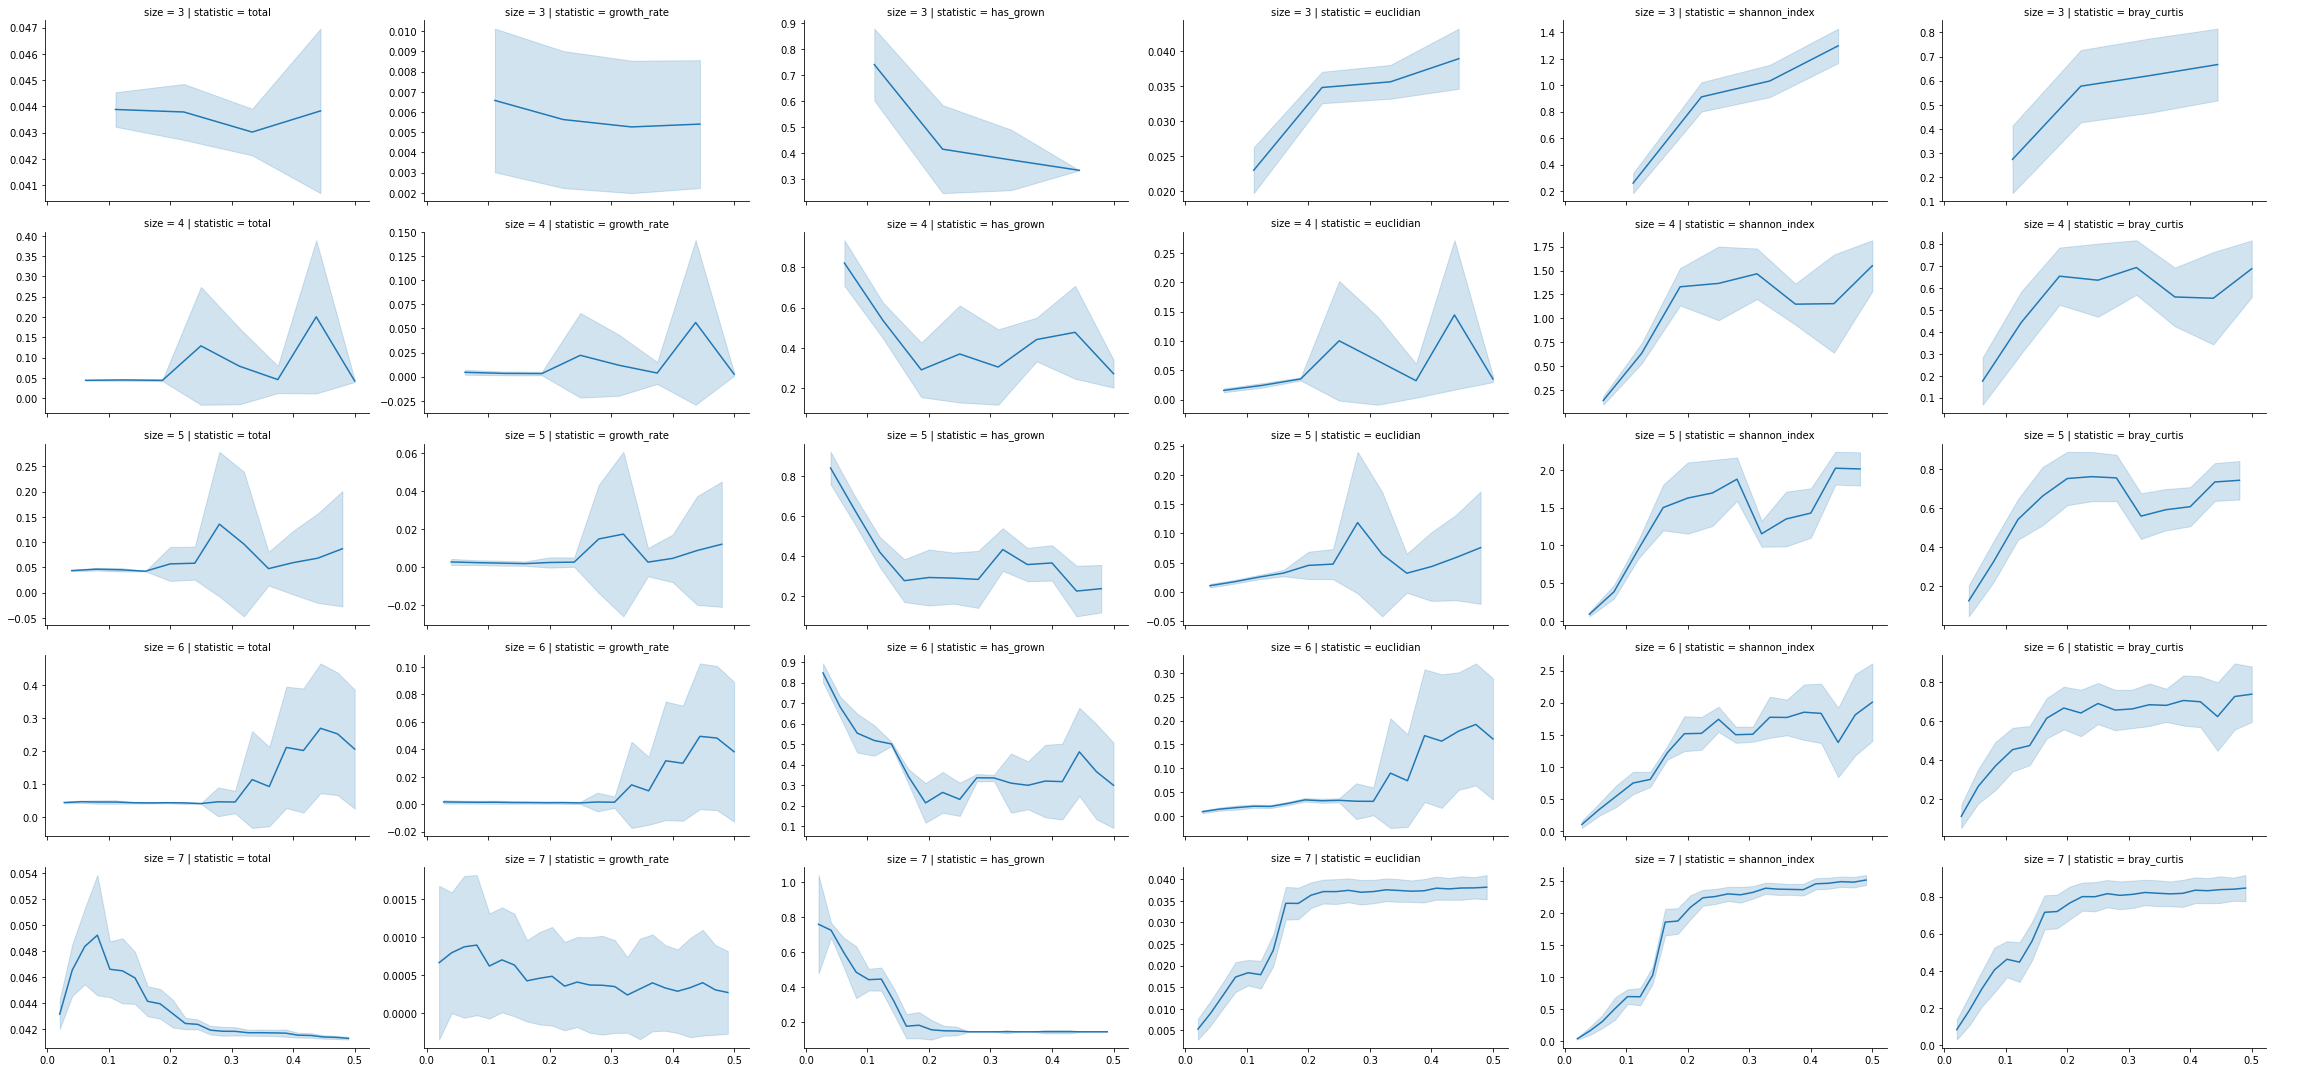

In [4]:
spa.plot_sparsity(df, '../Documents/figures/sparsity_analysis.png')